# Normalizing exponentially distributed data

In [18]:
# Algos
import numpy as np
from scipy import stats

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

First, let's generate a data set.

<AxesSubplot:>

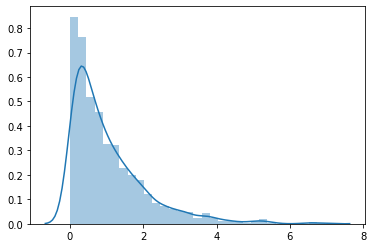

In [19]:
data = np.random.exponential(size = 1000)
sns.distplot(data, hist=True, kde=True, label="Skewed data")

Here's a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/) to illustrate that this data isn't close to normally distributed. (Normally distributed data would be close to the 45 degree line.)

'# suppress duplicate plot'

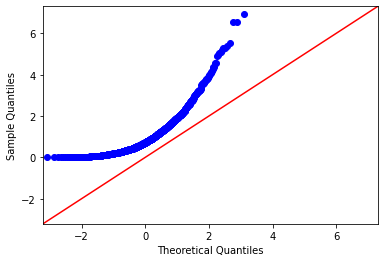

In [20]:
sm.qqplot(data, line='45')
; # suppress duplicate plot

Now we'll try a series of transformations to see how they behave on this data set.

## Log transform

<AxesSubplot:>

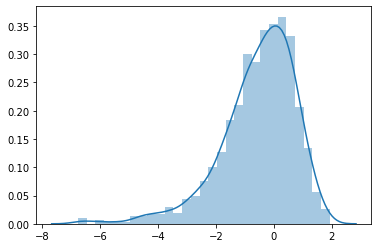

In [21]:
log_data = np.log(data)
sns.distplot(log_data, hist=True, kde=True, label="Log transformed data")

'# suppress duplicate plot'

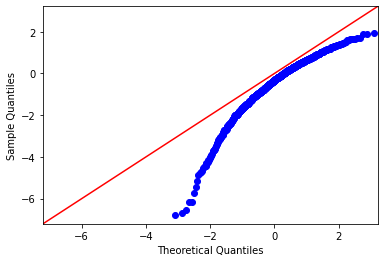

In [22]:
sm.qqplot(log_data, line='45')
; # suppress duplicate plot

## Square root transform

<AxesSubplot:>

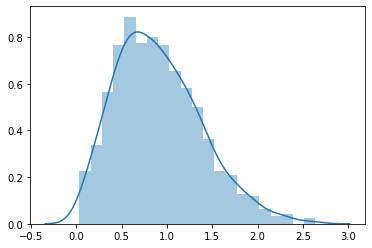

In [23]:
sqrt_data = np.sqrt(data)
sns.distplot(sqrt_data, hist=True, kde=True, label="Square root data")

'# suppress duplicate plot'

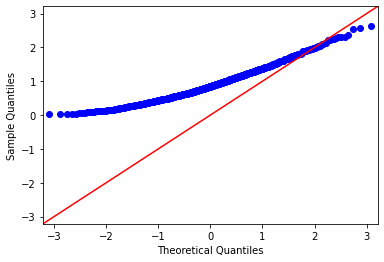

In [32]:
sm.qqplot(sqrt_data, line='45')
; # suppress duplicate plot

## Inverse transform (non-zero data only)

<AxesSubplot:>

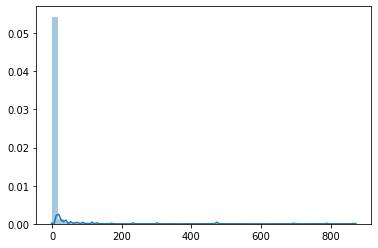

In [28]:
inv_data = np.reciprocal(data)
sns.distplot(inv_data, hist=True, kde=True, label="Inverse data")

'# suppress duplicate plot'

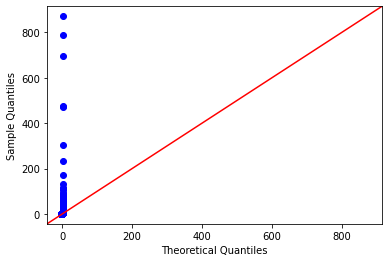

In [29]:
sm.qqplot(inv_data, line='45')
; # suppress duplicate plot

## Box-Cox transform

Helps with

- non-additivity (e.g., helps with STL time series decomposition, which assumes additivity)
- non-normality
- heteroskedaticity

See [The Box-Cox transformation technique: a review](https://www.researchgate.net/publication/268412346_The_Box-Cox_Transformation_Technique_A_Review) for more information.

Box-Cox: lambda=0.27679557039380565


<AxesSubplot:>

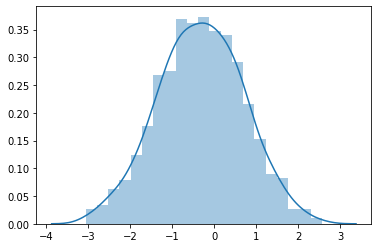

In [26]:
bc_data, bc_lambda = stats.boxcox(data)
print(f"Box-Cox: lambda={bc_lambda}")
sns.distplot(bc_data, hist=True, kde=True, label="Box-Cox data")

'# suppress duplicate plot'

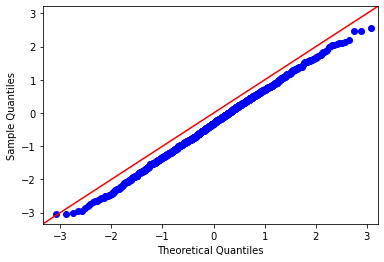

In [30]:
sm.qqplot(bc_data, line='45')
; # suppress duplicate plot